
#Introdução ao Apache Spark

Apache Spark é um framework de processamento de dados de código aberto projetado para ser rápido, fácil de usar e geral. Ele permite o processamento distribuído de grandes volumes de dados em clusters, suportando tarefas de processamento em lote e em tempo real. Spark é amplamente utilizado para análise de dados, aprendizado de máquina, processamento de streaming e muito mais.


#### História e Marcos do Apache Spark
*  2009: Desenvolvido originalmente na UC Berkeley’s AMPLab.
*  2010: Spark foi open-sourced.
*  2014: Tornou-se um projeto de alto nível da Apache Software Foundation.
*  2016: Spark 2.0 lançado, introduzindo DataFrames e Spark SQL.
*  2020: Spark 3.0 lançado, trazendo melhorias significativas em desempenho e novas APIs.
*  2024: Spark continua evoluindo, com foco em otimizações de desempenho e integração com tecnologias emergentes.

#Fundamentos do Apache Spark
#### RDDs (Resilient Distributed Datasets)

RDDs são a abstração fundamental no Spark, representando uma coleção distribuída de elementos que podem ser processados em paralelo. Eles são imutáveis e tolerantes a falhas.

##### Características:

* Imutabilidade: Uma vez criado, um RDD não pode ser alterado.
* Tolerância a falhas: Spark reconstrói automaticamente partes perdidas dos RDDs.
* Transformações e Ações: Operações que transformam os dados ou coletam resultados.

#### RDDs (Resilient Distributed Datasets)

#### **DataFrames**

DataFrames são uma abstração mais estruturada sobre RDDs, semelhantes a tabelas em bancos de dados relacionais. Eles permitem operações otimizadas e integração com Spark SQL.

**Vantagens:**

* Performance: Otimizações como o Catalyst Optimizer melhoram o desempenho.
* Facilidade de Uso: APIs mais amigáveis para manipulação de dados estruturados.
* Integração: Compatível com diversas fontes de dados e ferramentas de BI.


** Datasets Utilizados **

https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

In [11]:
!pip install kagglehub

In [12]:
import kagglehub

In [13]:

# Download da versão mais recente do dataset
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset")

100%|██████████| 21.6k/21.6k [00:00<00:00, 8.50MB/s]

Extracting files...


In [14]:
# Exibir o caminho onde o dataset foi salvo
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1


In [15]:
import numpy as np

In [17]:
# Carregar o dataset de membros de academia usando o caminho do KaggleHub
df_members = pd.read_csv('/root/.cache/kagglehub/datasets/valakhorasani/gym-members-exercise-dataset/versions/1/gym_members_exercise_tracking.csv')

In [18]:
# Exibir as primeiras linhas do dataset para garantir que foi carregado corretamente
print(df_members.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

In [19]:
import numpy as np

In [20]:
# Criar dataset sintético para Gym Equipment Usage
equipment_data = {
    'Member_ID': np.arange(1, len(df_members) + 1),  # Assumindo que cada membro tem um ID exclusivo
    'Equipment_Used': np.random.choice(['Treadmill', 'Dumbbell', 'Bench Press', 'Elliptical'], len(df_members)),
    'Usage_Duration (minutes)': np.random.randint(20, 120, len(df_members)),
    'Calories_Burned': np.random.randint(100, 1000, len(df_members)),
}

df_equipment_usage = pd.DataFrame(equipment_data)

In [21]:
# Exibir as primeiras linhas do dataset de equipamentos
print(df_equipment_usage.head())

   Member_ID Equipment_Used  Usage_Duration (minutes)  Calories_Burned
0          1    Bench Press                        44              658
1          2    Bench Press                       115              666
2          3    Bench Press                        63              790
3          4       Dumbbell                       111              143
4          5    Bench Press                        33              677


In [24]:
df_members['Member_ID'] = np.arange(1, len(df_members) + 1)

In [25]:
# Realizando a junção com base no 'Member_ID'
df_merged = pd.merge(df_members, df_equipment_usage, on='Member_ID', how='left')

In [26]:
# Exibindo o resultado da junção
print(df_merged.head())

   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned_x Workout_Type  Fat_Percentage  \
0                      1.69             1313.0         Yoga            12.6   
1                      1.30              883.0         HIIT            33.9   
2                      1.11              677.0       Cardio            33.4   
3                      0.59              532.0     Strength            28.8   
4                      0.64              556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0  

Comparar Calorias:

In [27]:
# Comparar calorias queimadas na sessão e com o equipamento
df_merged['Calorie_Difference'] = df_merged['Calories_Burned_x'] - df_merged['Calories_Burned_y']


In [28]:
# Exibir as primeiras linhas da diferença de calorias
print(df_merged[['Calories_Burned_x', 'Calories_Burned_y', 'Calorie_Difference']].head())

   Calories_Burned_x  Calories_Burned_y  Calorie_Difference
0             1313.0                658               655.0
1              883.0                666               217.0
2              677.0                790              -113.0
3              532.0                143               389.0
4              556.0                677              -121.0


Análise Gráfica (usando Matplotlib ou Seaborn):

In [29]:
import matplotlib.pyplot as plt


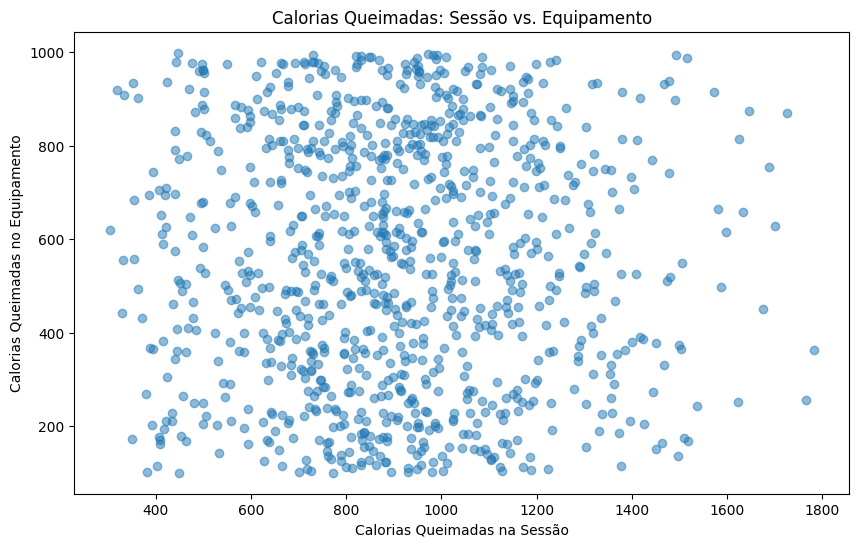

In [30]:
# Gráfico de calorias queimadas na sessão vs. no equipamento
plt.figure(figsize=(10,6))
plt.scatter(df_merged['Calories_Burned_x'], df_merged['Calories_Burned_y'], alpha=0.5)
plt.title('Calorias Queimadas: Sessão vs. Equipamento')
plt.xlabel('Calorias Queimadas na Sessão')
plt.ylabel('Calorias Queimadas no Equipamento')
plt.show()